# Data Exploration

## Import

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import funcs

In [2]:
df_master = pd.read_csv("archive/Base.csv")
df_master.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


## Explore features

In [3]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [4]:
print("Num instances fraud", n_fraud := len(df_master[df_master["fraud_bool"]==1]), f", {n_fraud/1000000}%")
print("Num instances not fraud", n_not_fraud := len(df_master[df_master["fraud_bool"]==0]), f", {n_not_fraud/1000000}%")

Num instances fraud 11029 , 0.011029%
Num instances not fraud 988971 , 0.988971%


In [5]:
cats = list()
print("CATEGORICAL COLUMS (NOT BOOLEANS)")
print("_________________________________")
for col in df_master:
    if (df_master[col].dtype==np.dtype(np.object_)):
        print(col, ",", df_master[col].unique())
        cats.append(col)

CATEGORICAL COLUMS (NOT BOOLEANS)
_________________________________
payment_type , ['AA' 'AB' 'AC' 'AD' 'AE']
employment_status , ['CA' 'CB' 'CC' 'CD' 'CE' 'CF' 'CG']
housing_status , ['BA' 'BB' 'BC' 'BD' 'BE' 'BF' 'BG']
source , ['INTERNET' 'TELEAPP']
device_os , ['windows' 'other' 'linux' 'macintosh' 'x11']


In [6]:
bools = list()
counts = list()
no_info = list()
for col in df_master:
    if (df_master[col].dtype==np.dtype(np.int64)):
        if (l := len(df_master[col].unique())) == 2:
            bools.append(col)
        elif l > 2:
            counts.append(col)
        else:
            no_info.append(col) #less than 2 unique values, useless
print("BOOLEANS, 0s, 1s")
print("________________")
for b in bools:
    print(f"{b}, {len(df_master[df_master[b]==0])}, {len(df_master[df_master[b]==1])}")
print("\n")
print("COUNTERS, Min, Avg, Max")
print("_______________________")
for c in counts:
    print(f"{c}, {min(df_master[c])}, {np.mean(df_master[c])}, {max(df_master[c])}")

print("\n")
print("NO INFO, Single Value")
print("________")
for b in no_info:
    print(b, df_master[b].unique())

BOOLEANS, 0s, 1s
________________
fraud_bool, 988971, 11029
email_is_free, 470114, 529886
phone_home_valid, 582923, 417077
phone_mobile_valid, 110324, 889676
has_other_cards, 777012, 222988
foreign_request, 974758, 25242
keep_alive_session, 423053, 576947


COUNTERS, Min, Avg, Max
_______________________
prev_address_months_count, -1, 16.718568, 383
current_address_months_count, -1, 86.587867, 428
customer_age, 10, 33.68908, 90
zip_count_4w, 1, 1572.692049, 6700
bank_branch_count_8w, 0, 184.361849, 2385
date_of_birth_distinct_emails_4w, 0, 9.503544, 39
credit_risk_score, -170, 130.989595, 389
bank_months_count, -1, 10.839303, 32
device_distinct_emails_8w, -1, 1.018312, 2
month, 0, 3.288674, 7


NO INFO, Single Value
________
device_fraud_count [0]


In [7]:
print("CONTINUOUS VALUES")
print("_________________")
nums = list()
for col in df_master:
    if (df_master[col].dtype==np.dtype(np.float64)):
        print(f"{col}, {min(df_master[col])}, {np.mean(df_master[col])}, {max(df_master[col])}")
        nums.append(col)

CONTINUOUS VALUES
_________________
income, 0.1, 0.5626956000000002, 0.9
name_email_similarity, 1.4345504845275636e-06, 0.4936940949631277, 0.9999993177937188
days_since_request, 4.036859788721786e-09, 1.025705230995808, 78.45690383509861
intended_balcon_amount, -15.530554840076814, 8.661498537172486, 112.9569276953714
velocity_6h, -170.60307235124628, 5665.296604795269, 16715.565404174275
velocity_24h, 1300.3073144849477, 4769.781964962282, 9506.896596111665
velocity_4w, 2825.748405284728, 4856.324015811874, 6994.764200834217
proposed_credit_limit, 190.0, 515.85101, 2100.0
session_length_in_minutes, -1.0, 7.544940201289998, 85.89914319274027


## Visualize

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 2 artists>

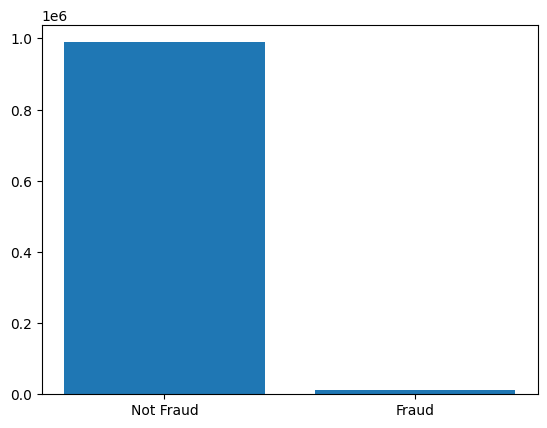

In [9]:
plt.bar(["Not Fraud", "Fraud"], [n_not_fraud, n_fraud])

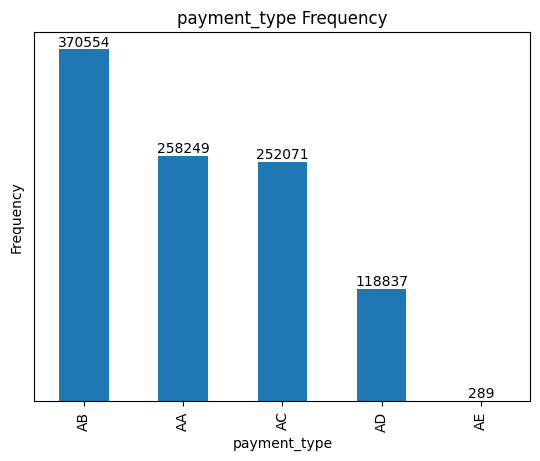

In [10]:
ax = df_master["payment_type"].value_counts().plot(kind="bar")
ax.set_title("payment_type Frequency")
ax.set_xlabel("payment_type")
ax.set_ylabel("Frequency")
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels(df_master["payment_type"].value_counts().index)

rects = ax.patches

# Make some labels.
labels = df_master["payment_type"].value_counts()

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

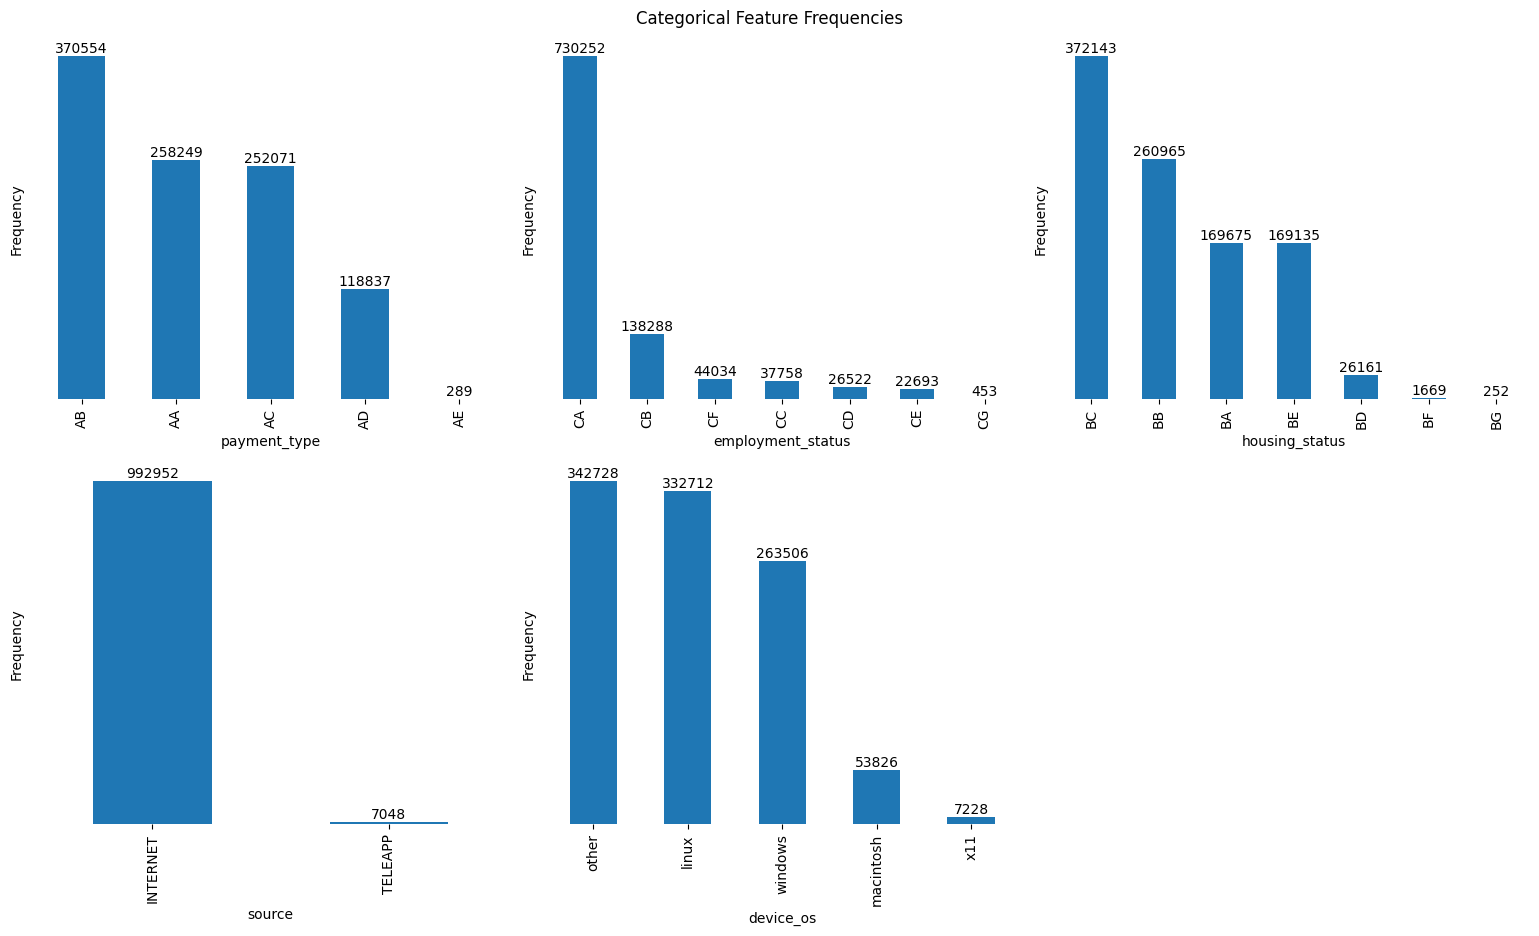

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15.5,9.5))

for i, cat in enumerate(cats):
    ax = axes[i // 3][i % 3]
    ax = df_master[cat].value_counts().plot(kind="bar", ax = ax)
    ax.set_xlabel(cat)
    ax.set_ylabel("Frequency")
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticklabels(df_master[cat].value_counts().index)

    rects = ax.patches

    # Make some labels.
    labels = df_master[cat].value_counts()

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
        )
fig.suptitle("Categorical Feature Frequencies")
fig.delaxes(axes[-1,-1])
fig.tight_layout()


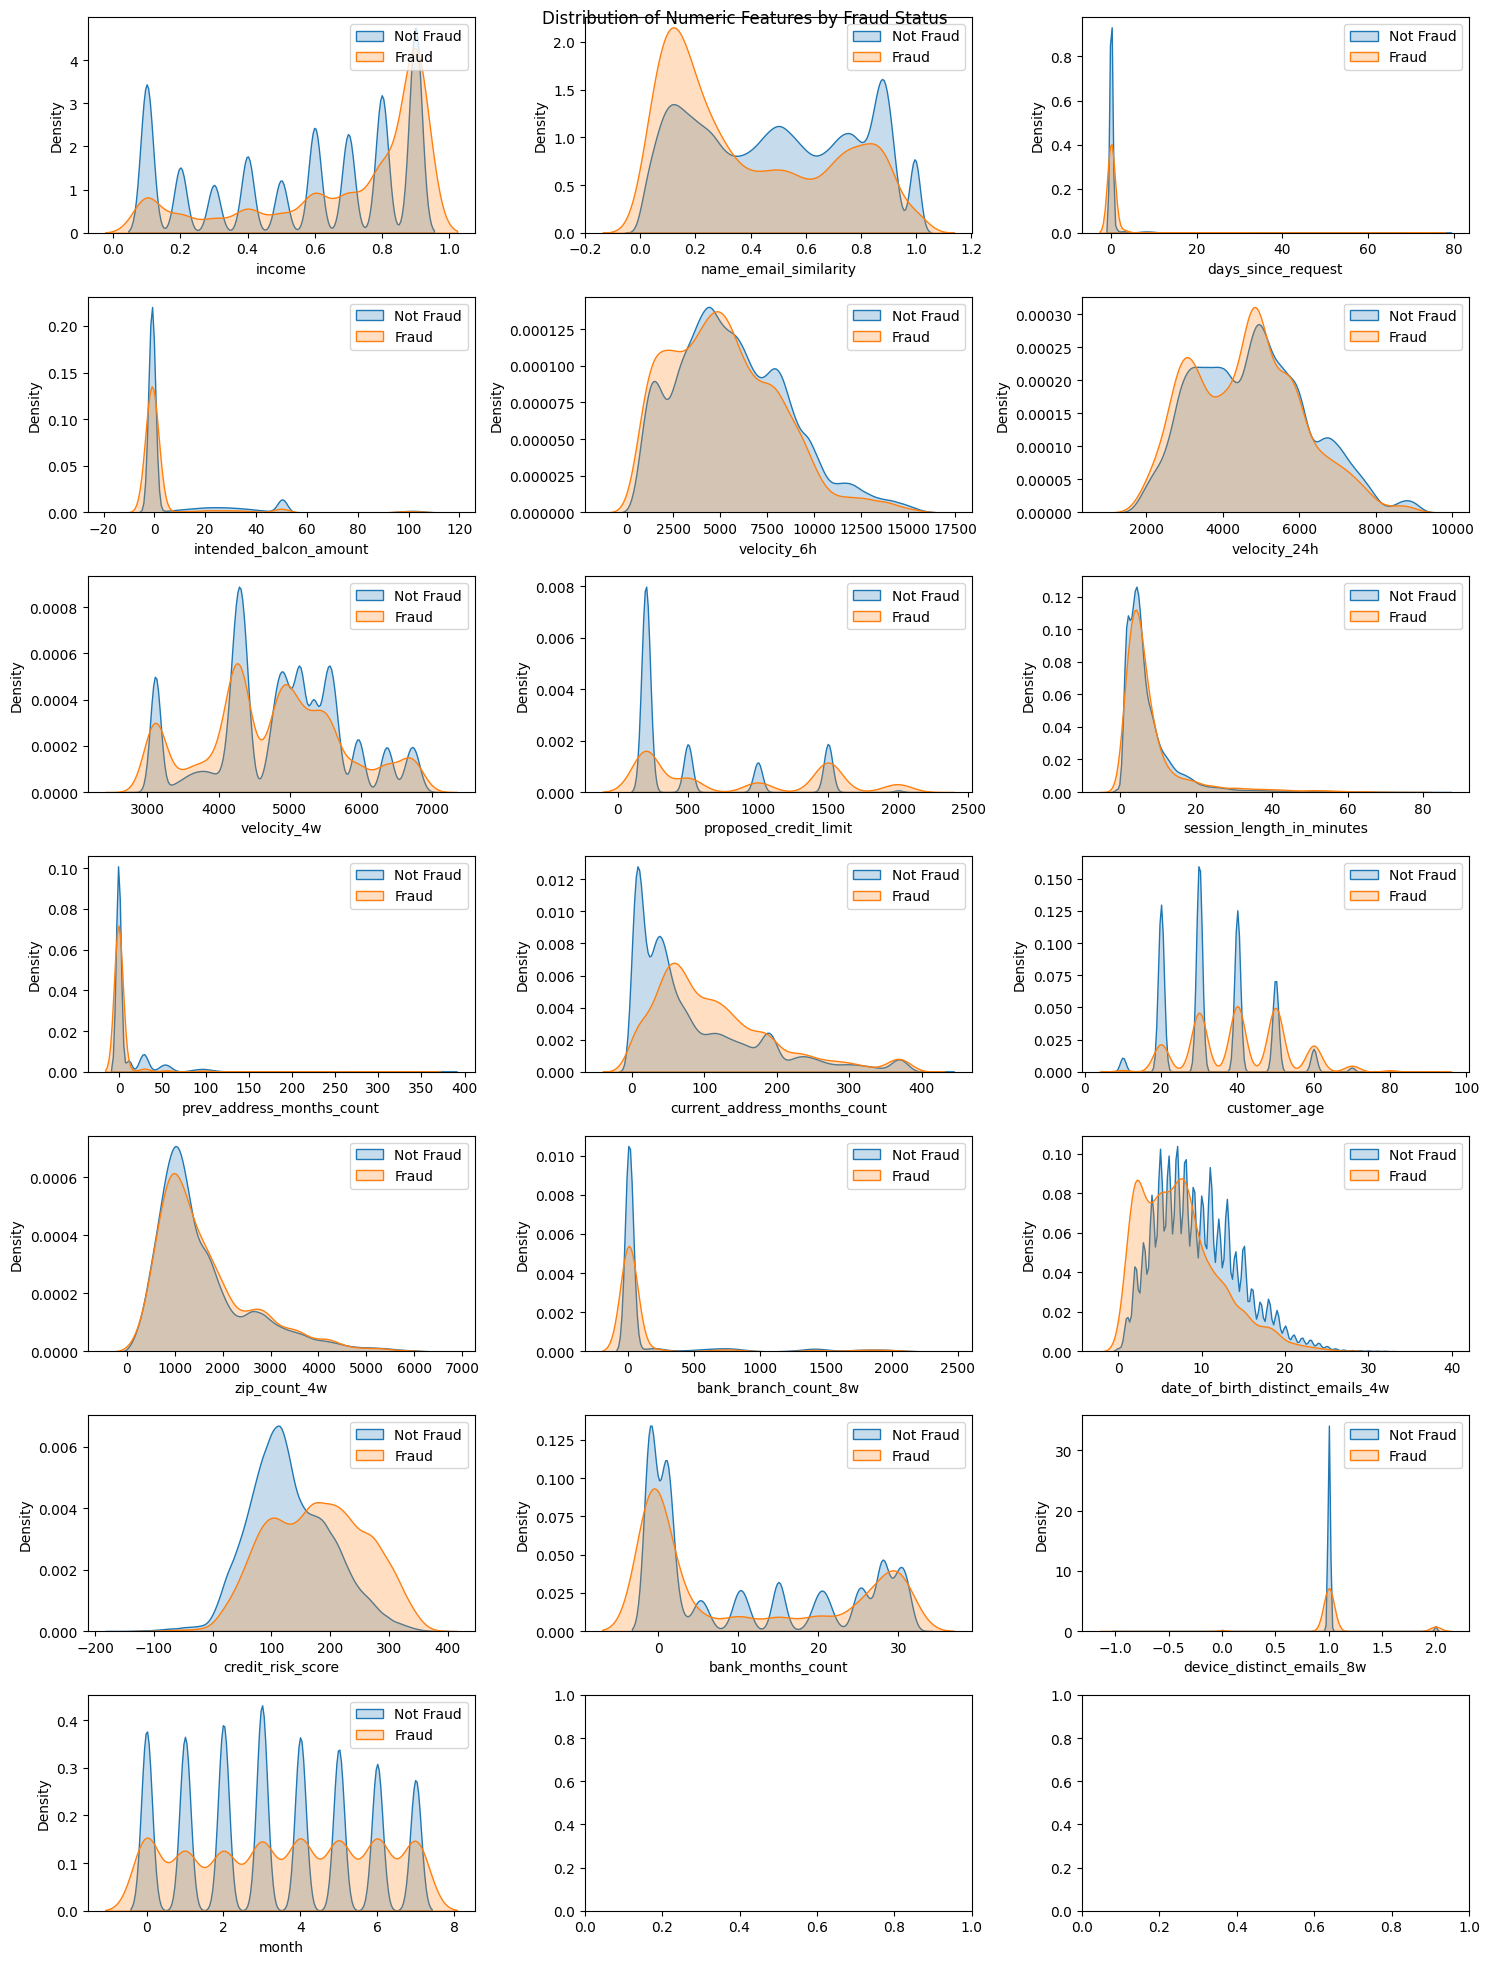

In [12]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(nums + counts):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df_master[df_master['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df_master[df_master['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

<BarContainer object of 9 artists>

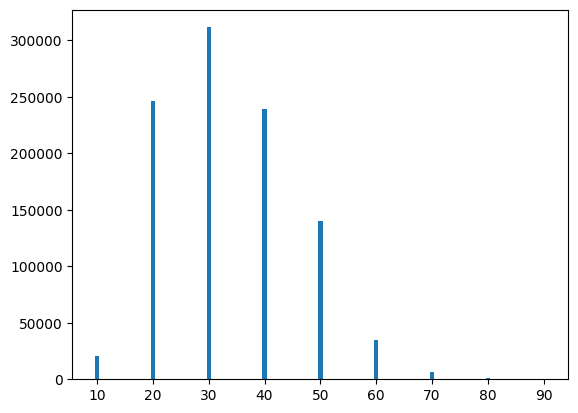

In [13]:
plt.bar(df_master["customer_age"].value_counts().index, df_master["customer_age"].value_counts())

<BarContainer object of 9 artists>

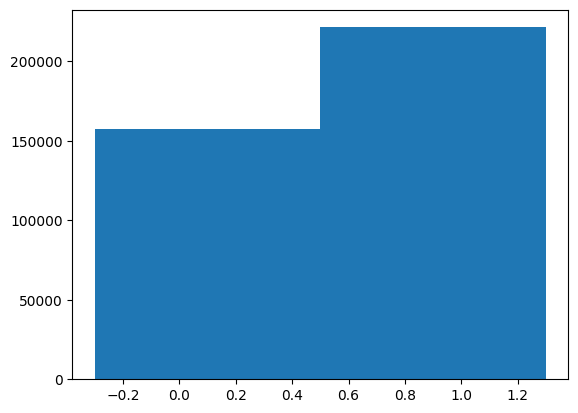

In [14]:
plt.bar(df_master["income"].value_counts().index, df_master["income"].value_counts())

<BarContainer object of 7 artists>

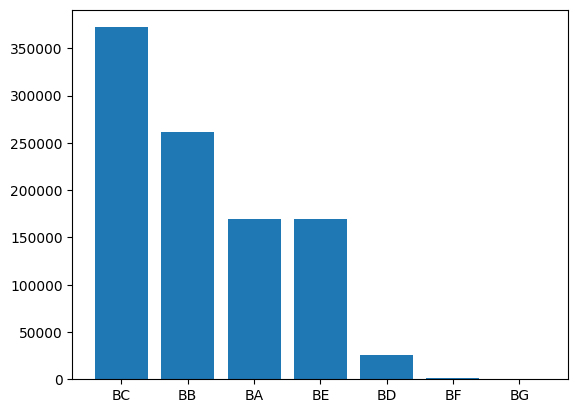

In [15]:
plt.bar(df_master["housing_status"].value_counts().index, df_master["housing_status"].value_counts())

## Handle Missing Data

In [16]:
# Create training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(df_master.loc[:, df_master.columns != "fraud_bool"], df_master["fraud_bool"]) # Separate test set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train) # Create training and validation sets from remaining data

# Make a copy with target column for grouping in charts 
df = X_train.copy()
df["fraud_bool"] = y_train.copy()

In [17]:
"""
The data set represents missing values with -1 for the following columns:
- prev_address_months_count
- current_address_months_count
- bank_months_count
- session_length_in_minutes
- device_distinct_emails_8w
"""

'\nThe data set represents missing values with -1 for the following columns:\n- prev_address_months_count\n- current_address_months_count\n- bank_months_count\n- session_length_in_minutes\n- device_distinct_emails_8w\n'

#### **prev_address_months_count** and **bank_months_count**

For these 2 features, the documentation it is noted this value represents the age of an applicants previous address or bank account (if registered or held). -1 is then not a missing value but rather an indicator that they did not previously have an account or another address. We will not edit these columns. 

In [18]:
# Features where -1 represents missing value
missing_feats = [
    "current_address_months_count",
    "session_length_in_minutes",
    "device_distinct_emails_8w"
]

### Check for Missing Randomness

In [19]:
from scipy.stats import chi2_contingency

In [20]:
a = .01
for feat in missing_feats:
    # Get Count of missing values for fraud vs non fraud
    miss = df[df[feat]==-1].groupby("fraud_bool")[feat].count()
    no_miss = df[df[feat]!=-1].groupby("fraud_bool")[feat].count()
    # Check for missing randomness
    chi2, p, dof, ex = chi2_contingency([[miss[0], no_miss[0]],[miss[1],no_miss[1]]])
    # Print results
    if p < a:
        print(f"{feat} missing NOT AT RANDOM, p = {p}")
    else: print(f"{feat} missing AT RANDOM, p = {p}")
    print(f"""
    #           | Missing (True)  | Not Missing (False) | Ratio Miss/No Miss
    # No Fraud  | {miss[0]}\t\t| {no_miss[0]}\t\t| {miss[0]/no_miss[0]}
    # Fraud     | {miss[1]}\t\t| {no_miss[1]}\t\t| {miss[1]/no_miss[1]}
    """)

current_address_months_count missing NOT AT RANDOM, p = 0.00040125173254591286

    #           | Missing (True)  | Not Missing (False) | Ratio Miss/No Miss
    # No Fraud  | 2394		| 553872		| 0.004322298292746339
    # Fraud     | 8		| 6226		| 0.00128493414712496
    
session_length_in_minutes missing AT RANDOM, p = 0.4213540049717731

    #           | Missing (True)  | Not Missing (False) | Ratio Miss/No Miss
    # No Fraud  | 1101		| 555165		| 0.001983194185512415
    # Fraud     | 9		| 6225		| 0.0014457831325301205
    
device_distinct_emails_8w missing AT RANDOM, p = 0.8418848250622949

    #           | Missing (True)  | Not Missing (False) | Ratio Miss/No Miss
    # No Fraud  | 196		| 556070		| 0.0003524736094376607
    # Fraud     | 3		| 6231		| 0.00048146364949446316
    


### Missing Not At Random

**current address months count** is our only feature missing not at random. We will use the SKLearn Iterative Imputer to replace the missing values.

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.impute import IterativeImputer
import importlib
from sklearn import set_config

In [22]:
# Create training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(df_master.loc[:, df_master.columns != "fraud_bool"], df_master["fraud_bool"]) # Separate test set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train) # Create training and validation sets from remaining data

# Make a copy with target column for grouping in charts 
df = X_train.copy()
df["fraud_bool"] = y_train.copy()

# Define our cols by type
one_hot_cols = [
        "payment_type", "employment_status", "housing_status",
        "source", "device_os"
    ]
skewed_cols = [
    "days_since_request", "intended_balcon_amount", "proposed_credit_limit",
    "current_address_months_count", "prev_address_months_count",
    "zip_count_4w", "bank_branch_count_8w", "date_of_birth_distinct_emails_4w",
    "bank_months_count"
]
std_cols = [
    "session_length_in_minutes", "velocity_6h", "velocity_24h", "device_distinct_emails_8w", "credit_risk_score"
]
minmax_cols = [
    "income", "name_email_similarity", "velocity_4w", "customer_age", "month"
]

# Fit OHE on training data
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
ohe.fit(np.array(X_train[one_hot_cols]))

# Fit imputer on training data
imputer  = IterativeImputer(random_state=42)
num_cols = skewed_cols + std_cols + minmax_cols
X_train.loc[X_train["current_address_months_count"]==-1,"current_address_months_count"] = np.nan #Only column we want imputed
imputer.fit(X_train.loc[:,num_cols])

# Fit scalers to training data

log_cols = ["session_length_in_minutes"]
X_train[log_cols] = np.log(X_train[log_cols] + 2)
mm_scaler = MinMaxScaler().fit(X_train[minmax_cols + std_cols])
pw_tranformer = PowerTransformer().fit(X_train[skewed_cols])
#std_scaler = StandardScaler().fit(df[std_cols]) # IF UNCOMMENT THE UN COMMENT IN FUNCS ALSO

#col_transformer = ColumnTransformer(
#    [
#        ("OHE", OneHotEncoder(), one_hot_cols),
#        ("Impute"  , IterativeImputer(random_state=42), ["current_address_months_count"]),
#        ("YeoJohnson", PowerTransformer(), skewed_cols),
#        ("StandardScaler",StandardScaler(),std_cols),
#        ("MinMaxScaler",MinMaxScaler(),minmax_cols)
#    ],
#    remainder='drop'
#  )
#col_transformer.fit_transform(df_master).size

#Transform all data sets
importlib.reload(funcs)
df_list = [X_train, X_valid, X_test]
target_list = [y_train, y_valid, y_test]
df_list_transformed = list()
for i, df in enumerate(df_list):
    y = target_list[i]
    df["target"] = y
    df_transformed = funcs.transform_df(
        df,
        imputer_fitted = imputer,
        ohe = ohe,
        #std_scaler = std_scaler,
        std_scaler = None,
        power_transformer = pw_tranformer,
        min_max_scaler = mm_scaler,
        do_log_transform = (i != 0) # X_train done before fitting scalers
        )
    df_list_transformed.append(df_transformed)
df_list_transformed[0].describe().T


c:\Users\Dylan\Documents\OU\DSA5900\Steimel_OUDSA5900\funcs.py:62: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,num_cols] = imputer_fitted.transform(df.loc[:,num_cols])
c:\Users\Dylan\Documents\OU\DSA5900\Steimel_OUDSA5900\funcs.py:62: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,num_cols] = imputer_fitted.transform(df.loc[:,num_cols])
c:\Users\Dylan\Documents\OU\DSA5900\Steimel_OUDSA5900\funcs.py:62: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a ne

,count,mean,std,min,25%,50%,75%,max
income,562303.0,0.578425,0.362856,0.000000,0.250000,0.625000,0.875000,1.000000
name_email_similarity,562303.0,0.494067,0.289004,0.000000,0.225879,0.492592,0.755659,1.000000
prev_address_months_count,562303.0,0.000066,1.000033,-0.633309,-0.633309,-0.633309,1.374868,1.810976
current_address_months_count,562303.0,-0.039481,4.289482,-773.432487,-0.739520,-0.022205,0.790170,2.137422
customer_age,562303.0,0.296100,0.150328,0.000000,0.125000,0.250000,0.375000,1.000000
days_since_request,562303.0,-0.000323,0.999535,-0.590633,-0.456771,-0.315118,-0.128259,3.108618
intended_balcon_amount,562303.0,0.000062,1.000067,-46.207248,-0.589676,-0.319467,0.847584,1.933558
zip_count_4w,562303.0,-0.000018,1.000040,-6.933787,-0.632776,-0.094315,0.615822,2.880645
velocity_6h,562303.0,0.346241,0.180126,0.000000,0.212738,0.325376,0.466876,1.000000
velocity_24h,562303.0,0.423990,0.180715,0.000000,0.280221,0.421421,0.544119,1.000000


### Missing at Random

Because of the large size of our dataset and the small amount of instances with missing data for our 2 features we determined were missing at random, we can simply drop the instances that are missing these values. <br>Note: This is done in out "transform_df" func so we can easily do the same thing to future data.

In [23]:
df_transformed

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
54585,0.750,0.158853,-0.633309,-0.460499,0.500,-0.370195,-0.449300,-0.705730,0.264247,0.192771,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
668562,0.375,0.384045,-0.633309,-0.676332,0.125,-0.422411,-0.285687,2.041645,0.198695,0.625320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44900,0.750,0.796557,-0.633309,0.261801,0.125,-0.308196,-0.426538,-0.171733,0.170792,0.151852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
150535,0.625,0.503484,-0.633309,0.573292,0.375,-0.295985,-0.412663,-0.434916,0.320471,0.305678,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
402389,0.250,0.739650,-0.633309,-0.208165,0.125,-0.283753,-0.814281,1.040170,0.480356,0.316779,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16948,1.000,0.396935,-0.633309,0.135722,0.500,-0.369048,-0.501645,-0.468734,0.210371,0.380528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
886904,1.000,0.674043,-0.633309,-0.006842,0.125,-0.554672,-0.376970,0.189984,0.332714,0.306296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
570013,0.125,0.624634,-0.633309,0.135722,0.500,-0.414721,-0.466889,-0.428835,0.342737,0.257791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
252224,0.875,0.875051,-0.633309,1.119456,0.500,-0.478409,-0.401971,1.860686,0.743731,0.504947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Outliers (TBD)

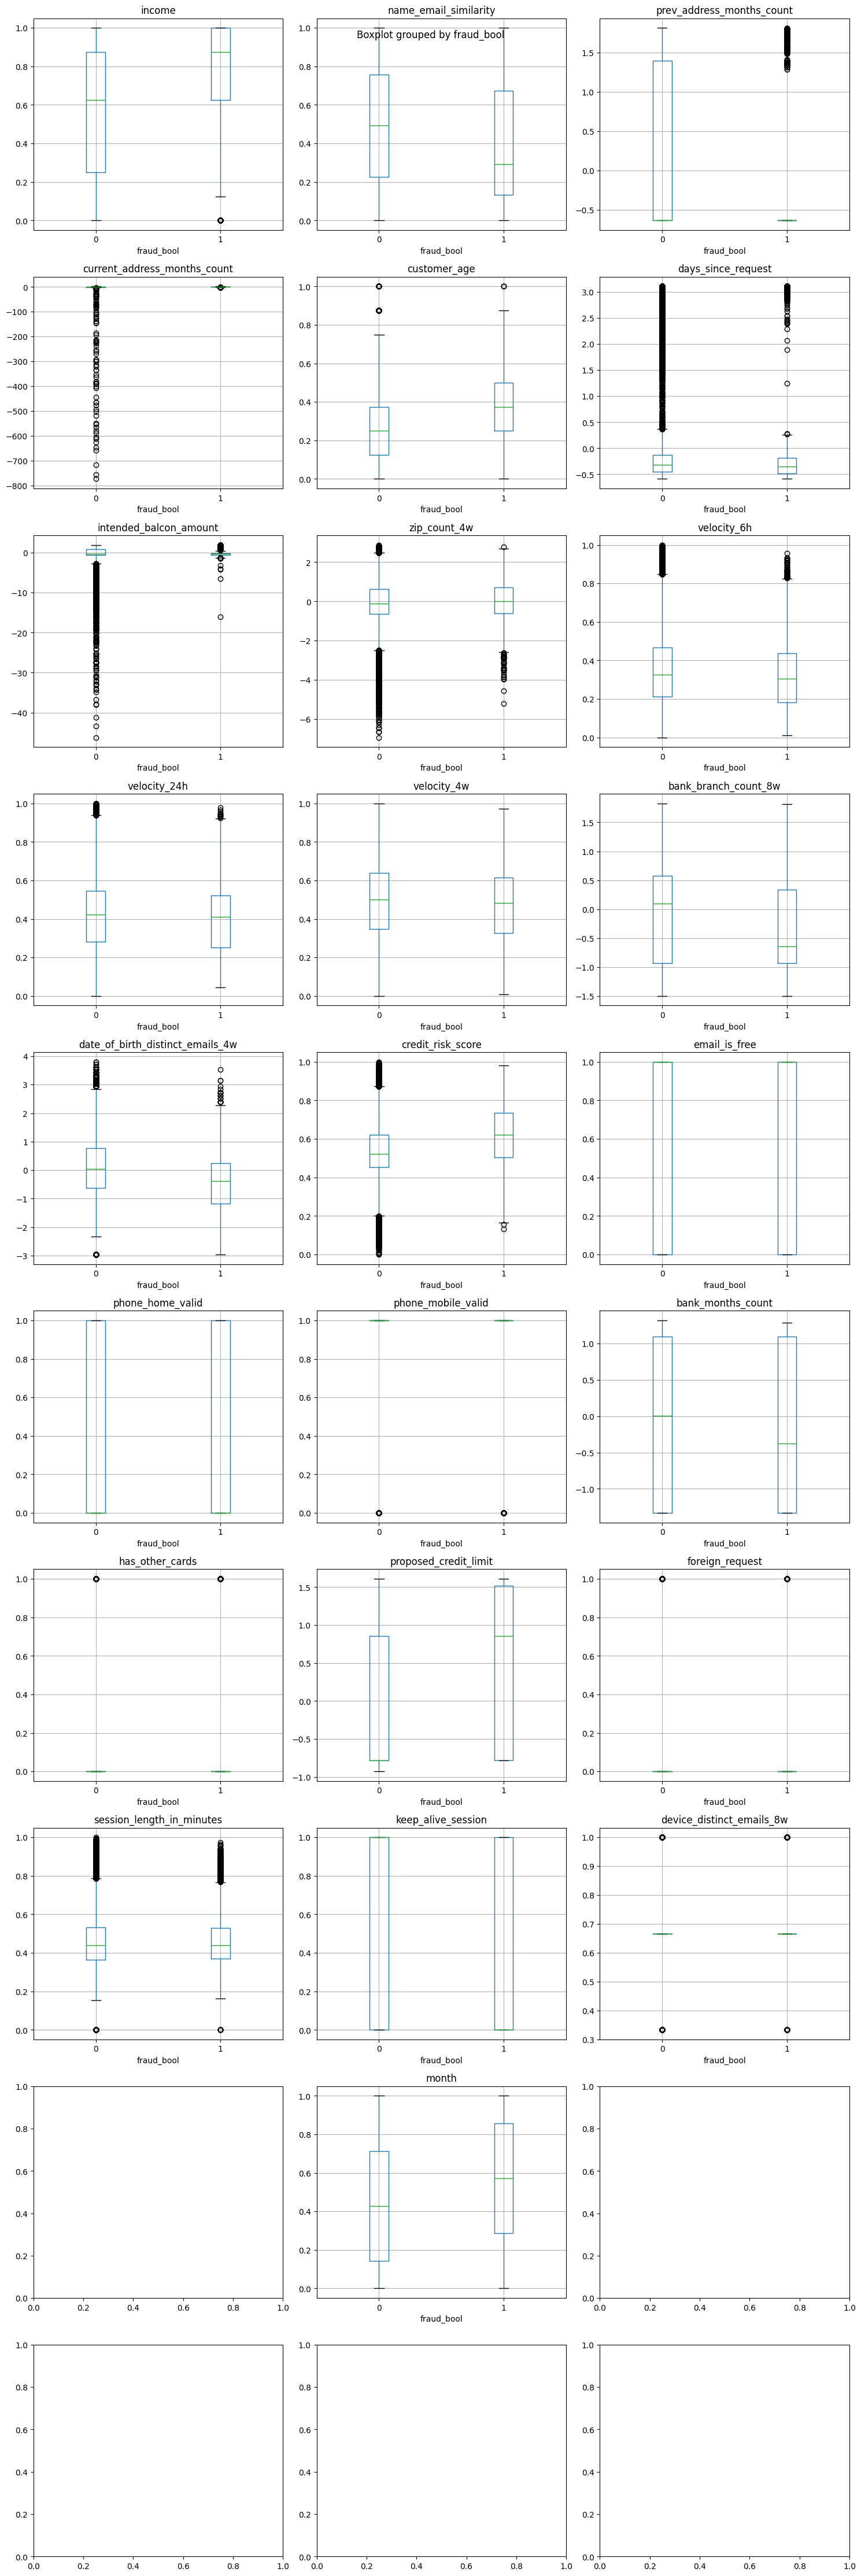

In [24]:
# Create a grid of subplots
c = len(df.select_dtypes(include=np.number).columns)
fig, axes = plt.subplots(nrows=(c//3)+1, ncols=3, figsize=(15, 45))

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feat in enumerate(df.select_dtypes(include=np.number).columns.values.tolist()[:-1]):
    try:
        ax = axes[i // 3][i % 3]
        pd.concat([df_list_transformed[0], y_train], axis=1).boxplot(feat, ax=ax, by='fraud_bool')
    except:
        pass

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [25]:
y_train

959715    0
912012    0
768574    0
138989    0
278768    0
         ..
317993    0
622462    0
47102     0
461333    0
81374     0
Name: fraud_bool, Length: 562500, dtype: int64

## Scaling

## PCA

In [26]:
from sklearn.decomposition import PCA

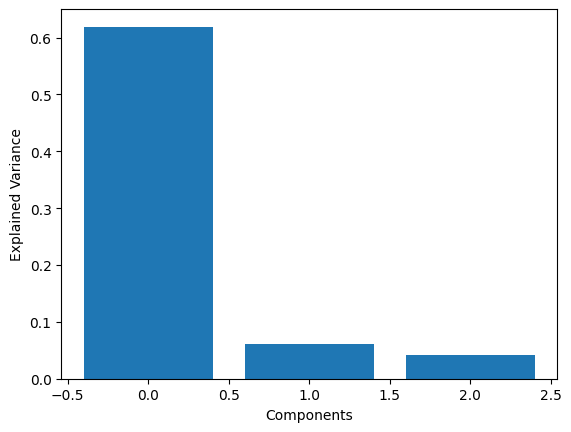

[0.61915583 0.06097422 0.04205354]


In [27]:
pca = PCA(n_components=3)
pca.fit(df_list_transformed[0])

# Reformat and view results
#loadings = pd.DataFrame(pca.components_.T,
#    columns=['PC%s' % _ for _ in range(len(df_list_transformed[0].columns))],
#    index=df.columns)
#print(loadings)

plt.bar(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()
print(pca.explained_variance_ratio_)

## Modeling

In [28]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier

In [29]:
X_train_transformed, X_valid_transformed, X_test_transformed = [df.loc[:, df.columns != "target"] for df in df_list_transformed]
y_train_transformed, y_valid_transformed, y_test_transformed = [df["target"] for df in df_list_transformed]

In [30]:
lr = LinearRegression().fit(X_train_transformed, y_train_transformed)
lg = LogisticRegression().fit(X_train_transformed, y_train_transformed)

c:\Users\Dylan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
ann = MLPClassifier(
    hidden_layer_sizes = (10),
    activation = 'tanh',
    solver = 'adam',
    learning_rate_init = .001,
    max_iter = 1000
    ).fit(X_train_transformed, y_train_transformed)

In [32]:
lr_pred = lr.predict(X_valid_transformed)
lg_pred = lg.predict(X_valid_transformed)

## Evaluation

In [33]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [34]:
confusion_matrix(y_valid_transformed, [p > .5 for p in lg_pred])

array([[185065,     17],
       [  1987,     26]], dtype=int64)

In [35]:
tn, fp, fn, tp = confusion_matrix(y_valid_transformed, [p > .5 for p in lg_pred]).ravel()
tn, fp, fn, tp

(185065, 17, 1987, 26)

In [36]:
roc_auc_score(y_valid_transformed, ann.predict_proba(X_valid_transformed)[:, 1])

0.8879050390484134

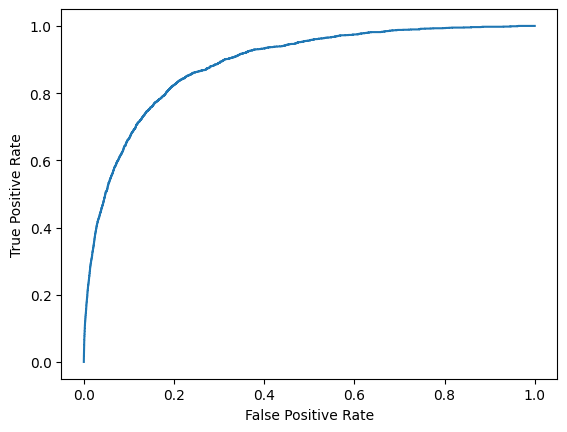

0.8879050390484134


In [37]:
#define metrics
y_pred_proba = ann.predict_proba(X_valid_transformed)[::,1]
fpr, tpr, _ = roc_curve(y_valid_transformed,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Print area
print(roc_auc_score(y_valid_transformed, ann.predict_proba(X_valid_transformed)[:, 1]))

In [38]:
#hl = [(10), (100), (10, 10), (20,10,10), (50, 20 ,10), (20, 10, 5)]
#lr = [.01, .001, .0001]
#itr = [200, 1000, 10000]
#act = ['tanh', 'relu', 'logistic']
#max_score = 0
#best_params = list()
#for h in hl:
#    for rate in lr:
#        for epochs in itr:
#            for func in act:
#                print(f"Starting {h}, {rate}, {epochs}, {func}")
#                ann = MLPClassifier(
#                    hidden_layer_sizes = h,
#                    activation = func,
#                    solver = 'adam',
#                    learning_rate_init = rate,
#                    max_iter = epochs
#                    ).fit(X_train_transformed, y_train_transformed)
#                if roc_auc_score(y_valid_transformed, ann.predict_proba(X_valid_transformed)[:, 1]) > max_score:
#                    max_score = roc_auc_score(y_valid_transformed, ann.predict_proba(X_valid_transformed)[:, 1])
#                    best_params = [h, rate, epochs, func]
#                    print("NEW BEST SCORE: ", max_score)
#                print("\n\n")
#print(f"best params: {best_params} \nbest score: {max_score}")

## Fairness

In [39]:
def get_performance_metrics(
    predictions: np.array,
    labels: np.array,
    fpr_threshold: float = 0.05,
):
    """For a given predictions vector, calculate the model performance.
    
    This calculates the TPR at the given target FPR threshold.
    
    Parameters
    ----------
    predictions : np.array
        The vector of scores (must be floats).
    labels : np.array
        The vector of labels (ground truth).
    fpr_threshold : float 
        The thresholding rule.

    Returns
    -------
    tpr : float
        The TPR for the defined threshold.
    fpr : float
        The observed FPR after thresholding.
    threshold : float
        The value for thresholding.
    """
    # We leverage sklearn's roc_curve method (tpr and fpr for each threshold)
    fprs, tprs, thresholds = roc_curve(labels, predictions)
    tpr = tprs[fprs<fpr_threshold][-1] # TPR for last 
    fpr = fprs[fprs<fpr_threshold][-1]
    threshold = thresholds[fprs<fpr_threshold][-1] # Min Prediction Proba that meets FPR reqs
    
    return tpr, fpr, threshold

In [40]:
def get_disparity_df(model, X_val, fpr_threshold=.05):
    # Create pred df for easy comparisons
    y_pred = model.predict_proba(X_val)[:, 1]
    disparity_df = pd.DataFrame()
    disparity_df["true_label"] = y_valid_transformed
    disparity_df["pred_prob"] = y_pred
    # Get performance as a whole
    tpr, fpr, prob_threshold = get_performance_metrics(disparity_df["pred_prob"], disparity_df["true_label"], fpr_threshold=fpr_threshold)
    to_pct = lambda x: str(round(x, 4) * 100) + "%"
    print("TPR: ", to_pct(tpr), "\nFPR: ", to_pct(fpr), "\nProb Threshold: ", round(prob_threshold, 2))
    # Get TP/TN/FP/FN
    disparity_df["pred_label"] = disparity_df["pred_prob"] > prob_threshold
    disparity_df["true_pos"] = (disparity_df['true_label'] == True) & (disparity_df['pred_label'] == True)
    disparity_df["true_neg"] = (disparity_df['true_label'] == False) & (disparity_df['pred_label'] == False)
    disparity_df["false_pos"] = (disparity_df['true_label'] == False) & (disparity_df['pred_label'] == True)
    disparity_df["false_neg"] = (disparity_df['true_label'] == True) & (disparity_df['pred_label'] == False)
    # Add in identifiers
    disparity_df["age"] = X_valid["customer_age"][disparity_df.index]
    disparity_df["income"] = X_valid["income"][disparity_df.index]
    disparity_df["employment_status"] = X_valid["employment_status"][disparity_df.index]
    return disparity_df

In [41]:
# Set params
proba_threshold = .05
model = ann
# Create pred df for easy comparisons
y_pred = model.predict_proba(X_valid_transformed)[:, 1]
disparity_df = pd.DataFrame()
disparity_df["true_label"] = y_valid_transformed
disparity_df["pred_prob"] = y_pred
# Get performance as a whole
tpr, fpr, prob_threshold = get_performance_metrics(disparity_df["pred_prob"], disparity_df["true_label"], fpr_threshold=.05)
to_pct = lambda x: str(round(x, 4) * 100) + "%"
print("TPR: ", to_pct(tpr), "\nFPR: ", to_pct(fpr), "\nProb Threshold: ", round(prob_threshold, 2))
# Get TP/TN/FP/FN
disparity_df["pred_label"] = disparity_df["pred_prob"] > prob_threshold
disparity_df["true_pos"] = (disparity_df['true_label'] == True) & (disparity_df['pred_label'] == True)
disparity_df["true_neg"] = (disparity_df['true_label'] == False) & (disparity_df['pred_label'] == False)
disparity_df["false_pos"] = (disparity_df['true_label'] == False) & (disparity_df['pred_label'] == True)
disparity_df["false_neg"] = (disparity_df['true_label'] == True) & (disparity_df['pred_label'] == False)
# Add in identifiers
disparity_df["age"] = X_valid["customer_age"][disparity_df.index]
disparity_df["income"] = X_valid["income"][disparity_df.index]
disparity_df["employment_status"] = X_valid["employment_status"][disparity_df.index]
disparity_df

TPR:  50.67% 
FPR:  4.93% 
Prob Threshold:  0.05


,true_label,pred_prob,pred_label,true_pos,true_neg,false_pos,false_neg,age,income,employment_status
450657,0,0.041104,False,False,True,False,False,20,0.8,CA
552941,0,0.000379,False,False,True,False,False,20,0.7,CB
344656,0,0.003860,False,False,True,False,False,40,0.4,CA
2777,0,0.000500,False,False,True,False,False,30,0.9,CA
285578,0,0.000566,False,False,True,False,False,30,0.2,CA
...,...,...,...,...,...,...,...,...,...,...
633497,0,0.015499,False,False,True,False,False,20,0.4,CA
963044,0,0.041137,False,False,True,False,False,30,0.9,CA
133268,0,0.000171,False,False,True,False,False,40,0.1,CA
998506,0,0.005669,False,False,True,False,False,20,0.4,CA


In [42]:
def get_disparity_dict(disparity_df, ok_fpr_diff = .05):
    fairness_cats = ["age", "income", "employment_status"]

    disparity_dict = dict()
    for cat in fairness_cats:
        cat_metrics = list()
        for val in disparity_df[cat].unique():
            sub = disparity_df[disparity_df[cat]==val]
            n_instances = len(sub.index)
            sub_tpr = sum(sub["true_pos"]) / n_instances
            sub_fpr = sum(sub["false_pos"]) / n_instances
            cat_metrics.append([val, n_instances, sub_tpr, sub_fpr, sub])
        disparity_dict[cat] = cat_metrics

    for cat in fairness_cats:
        max_fpr = -1
        max_val = None
        max_n = None
        min_fpr = 1
        min_val = None
        min_n = None
        for i in range(len(disparity_dict[cat])):
            cat_val = disparity_dict[cat][i][0]
            cat_n = disparity_dict[cat][i][1]
            if cat_n < 1000: continue
            cat_tpr = disparity_dict[cat][i][2]
            cat_fpr = disparity_dict[cat][i][3]
            if cat_fpr < min_fpr:
                min_fpr = cat_fpr
                min_val = cat_val
                min_n = cat_n
            if cat_fpr > max_fpr:
                max_fpr = cat_fpr
                max_val = cat_val
                max_n = cat_n
        if max_fpr - min_fpr <= ok_fpr_diff:
            print(f"""{cat} category is fair!
            Max fpr: {max_fpr}
            Max value: {max_val}
            Max n: {max_n}
            Min fpr: {min_fpr}
            Min value: {min_val}
            Min_n: {min_n}
            Difference: {max_fpr - min_fpr}""")
        else:
            print(f"""{cat} category is NOT fair!
            Max fpr: {max_fpr}
            Max value: {max_val}
            Max n: {max_n}
            Min fpr: {min_fpr}
            Min value: {min_val}
            Min n: {min_n}
            Difference: {max_fpr - min_fpr}""")
        print("\n\n")

        return disparity_dict

In [43]:
fairness_cats = ["age", "income", "employment_status"]
ok_fpr_diff = .05

disparity_dict = dict()
for cat in fairness_cats:
    cat_metrics = list()
    for val in disparity_df[cat].unique():
        sub = disparity_df[disparity_df[cat]==val]
        n_instances = len(sub.index)
        sub_tpr = sum(sub["true_pos"]) / n_instances
        sub_fpr = sum(sub["false_pos"]) / n_instances
        cat_metrics.append([val, n_instances, sub_tpr, sub_fpr, sub])
    disparity_dict[cat] = cat_metrics

for cat in fairness_cats:
    max_fpr = -1
    max_val = None
    max_n = None
    min_fpr = 1
    min_val = None
    min_n = None
    for i in range(len(disparity_dict[cat])):
        cat_val = disparity_dict[cat][i][0]
        cat_n = disparity_dict[cat][i][1]
        if cat_n < 1000: continue
        cat_tpr = disparity_dict[cat][i][2]
        cat_fpr = disparity_dict[cat][i][3]
        if cat_fpr < min_fpr:
            min_fpr = cat_fpr
            min_val = cat_val
            min_n = cat_n
        if cat_fpr > max_fpr:
            max_fpr = cat_fpr
            max_val = cat_val
            max_n = cat_n
    if max_fpr - min_fpr <= ok_fpr_diff:
        print(f"""{cat} category is fair!
        Max fpr: {max_fpr}
        Max value: {max_val}
        Max n: {max_n}
        Min fpr: {min_fpr}
        Min value: {min_val}
        Min_n: {min_n}
        Difference: {max_fpr - min_fpr}""")
    else:
        print(f"""{cat} category is NOT fair!
        Max fpr: {max_fpr}
        Max value: {max_val}
        Max n: {max_n}
        Min fpr: {min_fpr}
        Min value: {min_val}
        Min n: {min_n}
        Difference: {max_fpr - min_fpr}""")
    print("\n\n")

age category is NOT fair!
        Max fpr: 0.16624895572263992
        Max value: 70
        Max n: 1197
        Min fpr: 0.00708502024291498
        Min value: 10
        Min n: 3952
        Difference: 0.15916393547972493



income category is NOT fair!
        Max fpr: 0.09174930201213055
        Max value: 0.9
        Max n: 41548
        Min fpr: 0.01650581454830679
        Min value: 0.1
        Min n: 29323
        Difference: 0.07524348746382375



employment_status category is NOT fair!
        Max fpr: 0.13450704225352111
        Max value: CC
        Max n: 7100
        Min fpr: 0.0015876893014167073
        Min value: CF
        Min n: 8188
        Difference: 0.1329193529521044





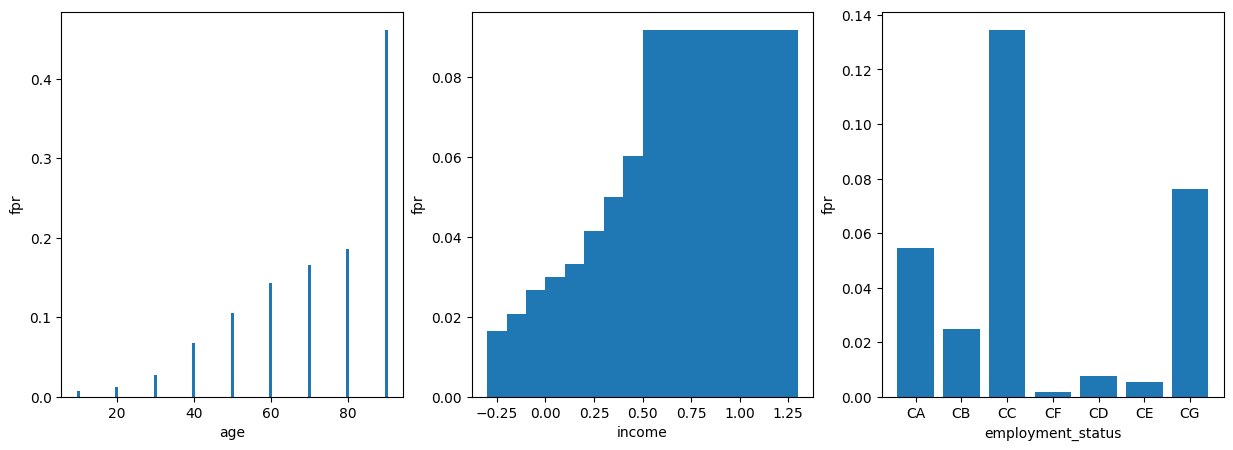

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Loop through the numeric features and plot a kernel density plot for each feature
for i, cat in enumerate(disparity_dict):
    ax = axes[i]
    ax.bar([x[0] for x in disparity_dict[cat]], 
            [x[3] for x in disparity_dict[cat]])
    ax.set_xlabel(cat)
    ax.set_ylabel("fpr")
plt.show()

In [45]:
def plot_fpr_by_cat(disparity_dict):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

    # Loop through the numeric features and plot a kernel density plot for each feature
    for i, cat in enumerate(disparity_dict):
        ax = axes[i]
        ax.bar([x[0] for x in disparity_dict[cat]], 
                [x[3] for x in disparity_dict[cat]])
        ax.set_xlabel(cat)
        ax.set_ylabel("fpr")
    plt.show()

In [46]:
import scipy.stats.distributions as dist
import scipy.stats as stats
import itertools
from sklearn.metrics import log_loss
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:


advisary = keras.models.Sequential()

advisary.add(Dense(100, input_shape=(1,), activation='relu'))
advisary.add(Dense(50, activation='relu'))
advisary.add(Dense(10, activation='softmax'))

advisary.compile(loss='categorical_crossentropy', optimizer='adam')


In [48]:
def adv_loss(y_pred):
    #adv_model.predict(y_pred)
    pass

def clf_loss(y_true, y_pred, lam):
    loss = log_loss(y_true, y_pred)
    loss += adv_loss(y_pred)


### Adversarial Debiasing

In [288]:
import os
import torch
from torch import nn
import tensorflow as tf

In [289]:
batch_size = 256
n_pretrain_epochs = 30

#### Pretrain classifier

In [305]:
class NNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(46, 10)
        self.act1 = nn.Tanh()
        self.output = nn.Linear(10, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.hidden1(x)) # Call activation func on hidden layer
        x = self.act_output(self.output(x)) # Call act func on output
        return x

clf_model = NNClassifier()

loss_fn1 = nn.BCELoss() # Use Binary Cross Entropy for pre-training loss
opt_clf = torch.optim.Adam(clf_model.parameters(), lr = .001)

# Put data in tensor objects for PyTorch
X_clf = torch.tensor(X_train_transformed.values).to(torch.float32) # pd.DataFrame for tf.tensor
y_clf = torch.tensor(y_train_transformed.values).to(torch.float32).unsqueeze(1) # pd.DataFrame for tf.tensor in shape(n_instance, 1)

#Run training epochs
for epoch in range(n_pretrain_epochs):
    for i in range(0, len(X_clf), batch_size):
        Xbatch = X_clf[i:i+batch_size]
        y_pred = clf_model(Xbatch)
        ybatch = y_clf[i:i+batch_size]
        loss = loss_fn1(y_pred, ybatch)
        opt_clf.zero_grad()
        loss.backward()
        opt_clf.step()
    print(f'Finished epoch {epoch}, latest batch loss {loss}')

y_pred_clf = clf_model(X_clf)
print(f"Loss on entire training set: {loss_fn1(y_pred_clf, y_clf)}")

Finished epoch 0, latest batch loss 0.011319068260490894
Finished epoch 1, latest batch loss 0.009547941386699677
Finished epoch 2, latest batch loss 0.009313331916928291
Finished epoch 3, latest batch loss 0.009286525659263134
Finished epoch 4, latest batch loss 0.009308617562055588
Finished epoch 5, latest batch loss 0.009343591518700123
Finished epoch 6, latest batch loss 0.009388795122504234
Finished epoch 7, latest batch loss 0.00943952426314354
Finished epoch 8, latest batch loss 0.00949953030794859
Finished epoch 9, latest batch loss 0.009579482488334179
Finished epoch 10, latest batch loss 0.009697187691926956
Finished epoch 11, latest batch loss 0.009829184040427208
Finished epoch 12, latest batch loss 0.009984343312680721
Finished epoch 13, latest batch loss 0.010125146247446537
Finished epoch 14, latest batch loss 0.010254540480673313
Finished epoch 15, latest batch loss 0.010355731472373009
Finished epoch 16, latest batch loss 0.010447496548295021
Finished epoch 17, latest 

#### Pretrain adversarial model

In [306]:
class NNAdversarial(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(1, 10)
        self.act1 = nn.Tanh()
        self.output = nn.Linear(10, 9)
        self.act_output = nn.ReLU()

    def forward(self, x):
        x = self.act1(self.hidden1(x)) # Call activation func on hidden layer
        x = self.act_output(self.output(x)) # Call act func on output
        return x

adv_model = NNAdversarial()

loss_fn2 = nn.CrossEntropyLoss()
opt_adv = torch.optim.Adam(adv_model.parameters(), lr = .001)

X_adv = clf_model(torch.tensor(X_train_transformed.values).to(torch.float32))

# Get income targets
incomes = np.unique(X_train_transformed["income"])
y_income = pd.DataFrame()
y_income["target"] = X_train_transformed["income"].copy()
for val in incomes:
    y_income[f"income_{val}"] = (y_income["target"] == val).astype(int)
cols = y_income.columns.tolist()
cols.remove("target")
y_adv = torch.tensor(y_income[cols].values).to(torch.float32)

# Run training epochs
for epoch in range(n_pretrain_epochs):
    for i in range(0, len(X_adv), batch_size):
        Xbatch = X_adv[i:i+batch_size]
        y_pred = adv_model(Xbatch)
        ybatch = y_adv[i:i+batch_size]
        loss = loss_fn2(y_pred, ybatch)
        opt.zero_grad()
        loss.backward(retain_graph=True) # Keep tensor history for back prop
        opt.step()
    loss.detach_() # Remove history from previous epoch
    print(f'Finished epoch {epoch}, latest batch loss {loss}')

y_pred_adv = adv_model(X_adv)
print(f"Loss on entire training set: {loss_fn2(y_pred_adv, y_adv)}")

#### Perform Adversarial Debiasing

In [ ]:
iter = 1000 # Iterations to train
lam = .5 # Importance of adv_loss

for t in range(iter):
    # Train adversarial model on single epoch with fixed classifier
    X_adv = clf_model(torch.tensor(X_train_transformed.values).to(torch.float32)) # Get preds for clf
    # # Fit adv model and get its loss
    for i in range(0, len(X_adv), batch_size):
        Xbatch = X_adv[i:i+batch_size]
        y_pred = adv_model(Xbatch)
        ybatch = y_adv[i:i+batch_size]
        loss_adv = loss_fn2(y_pred, ybatch)
        opt_adv.zero_grad()
        loss_adv.backward(retain_graph=True) # Keep tensor history for back prop
        opt_adv.step()
    loss_adv.detach_()
    adv_loss = loss_fn2(adv_model(X_adv), y_adv)

    # Train classifier on single batch keeping adversarial fixed
    # # Get random input batch
    for i in range(0, len(X_adv), batch_size):
        Xbatch = X_clf[i:i+batch_size]
        y_pred = clf_model(Xbatch)
        ybatch = y_clf[i:i+batch_size]
        loss_clf = loss_fn1(y_pred, ybatch) - lam * adv_loss # Subtract adv_loss, goal is minimization so large adv_loss is better
        opt_clf.zero_grad()
        loss_clf.backward()
        opt_clf.step()
    #idxs = torch.randperm(len(X_clf))[:batch_size]
    #Xbatch = X_clf[idxs]
    #ybatch = y_clf[idxs]
    # # Fit classifier and account for advesarial loss
    #y_pred = clf_model(Xbatch)
    #loss_clf = loss_fn1(y_pred, ybatch) - lam * adv_loss # Subtract adv_loss, goal is minimization so large adv_loss is better
    #opt_clf.zero_grad()
    #loss_clf.backward()
    #opt_clf.step()
    print(f'Iteration {t}\tClf Loss: {loss_clf}\tadv_loss {adv_loss}')
torch.save(clf_model, "clf_debiased.pt")


Iteration 0	Clf Loss: -1.0771183967590332	adv_loss 2.1903185844421387


Iteration 1	Clf Loss: -1.0676292181015015	adv_loss 2.1903092861175537


Iteration 2	Clf Loss: -1.0848520994186401	adv_loss 2.190307140350342


Iteration 3	Clf Loss: -1.0671144723892212	adv_loss 2.1903016567230225


Iteration 4	Clf Loss: -1.0233701467514038	adv_loss 2.1902976036071777


Iteration 5	Clf Loss: -1.0710028409957886	adv_loss 2.1902916431427


Iteration 6	Clf Loss: -1.047785997390747	adv_loss 2.1902875900268555


Iteration 7	Clf Loss: -1.0740852355957031	adv_loss 2.190281867980957


Iteration 8	Clf Loss: -1.0432811975479126	adv_loss 2.1902785301208496


Iteration 9	Clf Loss: -1.053053617477417	adv_loss 2.1902735233306885


Iteration 10	Clf Loss: -1.0602372884750366	adv_loss 2.19026780128479


Iteration 11	Clf Loss: -1.0584568977355957	adv_loss 2.190261125564575


Iteration 12	Clf Loss: -1.0167245864868164	adv_loss 2.1902568340301514


Iteration 13	Clf Loss: -1.0491752624511719	adv_loss 2.1902496814727783

KeyboardInterrupt: 

In [304]:
#torch.save(clf_model, "clf_model.pt")

### Stop

In [57]:
def get_group_fairness(pop: pd.DataFrame, group: pd.DataFrame):
    n1 = len(pop.index) # Length of sample 1
    n2 = len(group.index) # Length of sample 2
    p1 = sum(pop["false_pos"]) / n1 # FP proportion for sample 1
    p2 = sum(group["false_pos"]) / n2 # FP proportion for sample 2
    p = (   # Proportion for combined samples
            (sum(pop["false_pos"]) + sum(group["false_pos"]))
            /(n1 + n2)
        )
    Z = (
        ((p1 - p2) - 0)
        / np.sqrt(p * (1-p) * ((1/n1)+(1/n2)))
    )
    pval = 2*dist.norm.cdf(-np.abs(Z))
    return pval

In [58]:
# H0: p1 - p2 = 0,  Proportions are the same
# H1: p1 - p2 != 0, Proportions are different

def compare_proportions(s1: pd.DataFrame, s2: pd.DataFrame, a: float = .05):
    n1 = len(s1.index) # Length of sample 1
    n2 = len(s2.index) # Length of sample 2
    p1 = sum(s1["false_pos"]) / n1 # FP proportion for sample 1
    p2 = sum(s2["false_pos"]) / n2 # FP proportion for sample 2
    p = (   # Proportion for combined samples
            (sum(s1["false_pos"]) + sum(s2["false_pos"]))
            /(n1 + n2)
        )
    Z = (
        ((p1 - p2) - 0)
        / np.sqrt(p * (1-p) * ((1/n1)+(1/n2)))
    )
    pval = 2*dist.norm.cdf(-np.abs(Z))
    return pval

compare_proportions(disparity_dict['age'][0][-1], disparity_dict['age'][3][-1]) 


0.0

In [59]:
pvals = np.zeros((len(disparity_dict["age"]),len(disparity_dict["age"])))
for r, row in enumerate(pvals):
    for c, col in enumerate(row):
        pvals[r][c] = (compare_proportions(disparity_dict['age'][r][-1], disparity_dict['age'][c][-1]))
pvals

array([[1.00000000e+000, 0.00000000e+000, 9.84059576e-066,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        4.20628806e-003, 3.76773477e-119, 9.38750926e-049],
       [0.00000000e+000, 1.00000000e+000, 9.30239627e-204,
        1.12706160e-070, 2.53046143e-104, 1.74338850e-040,
        1.52615778e-050, 6.17896604e-013, 1.30279011e-008],
       [9.84059576e-066, 9.30239627e-204, 1.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 9.55602083e-170,
        8.58247576e-015, 3.84395348e-048, 1.12327768e-021],
       [0.00000000e+000, 1.12706160e-070, 0.00000000e+000,
        1.00000000e+000, 4.88434620e-019, 1.61976081e-011,
        3.26189897e-087, 5.87100918e-005, 2.66891968e-005],
       [0.00000000e+000, 2.53046143e-104, 0.00000000e+000,
        4.88434620e-019, 1.00000000e+000, 4.16149821e-002,
        2.94087366e-121, 7.08286990e-002, 1.11223472e-003],
       [0.00000000e+000, 1.74338850e-040, 9.55602083e-170,
        1.61976081e-011, 4.16149821e-002, 1.0000000

In [60]:
def get_pval_array(disparity_dict):
    pvals = np.zeros((len(disparity_dict["age"]),len(disparity_dict["age"])))
    for r, row in enumerate(pvals):
        for c, col in enumerate(row):
            pvals[r][c] = (compare_proportions(disparity_dict['age'][r][-1], disparity_dict['age'][c][-1]))
    
    return pvals

def plot_pval_heatmap(disparity_dict):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,8))

    for i, cat in enumerate(disparity_dict):
        ax = axes[i]
        pvals = np.zeros((len(disparity_dict[cat]),len(disparity_dict[cat])))
        for r, row in enumerate(pvals):
            for c, col in enumerate(row):
                pvals[r][c] = (compare_proportions(disparity_dict[cat][r][-1], disparity_dict[cat][c][-1]))
        im = ax.imshow(pvals, cmap="Reds_r")
        ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

        # Show all ticks and label them with the respective list entries
        if cat != "income":
            ax.set_xticks(np.arange(len(pvals)), labels=[x[0] for x in disparity_dict[cat]])
            ax.set_yticks(np.arange(len(pvals)), labels=[x[0] for x in disparity_dict[cat]])
        else:
            ax.set_xticks(np.arange(len(pvals)), labels=['%.1f' % x[0] for x in disparity_dict[cat]])
            ax.set_yticks(np.arange(len(pvals)), labels=['%.1f' % x[0] for x in disparity_dict[cat]])
        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), ha="center")

        # Loop over data dimensions and create text annotations.
        for i in range(len(pvals)):
            for j in range(len(pvals[0])):
                text = ax.text(j, i, '%.3f' % pvals[i, j],
                            ha="center", va="center", color="w")

        ax.set_title(f"Pvals for Proportion difference by {cat}")
        #fig.tight_layout()
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([.15, .05, .6, 0.025])
    fig.colorbar(im, cax=cbar_ax, orientation="horizontal")
    fig.suptitle("FPR Proportion Significance: P-Values by Category", size=20)
    plt.show()

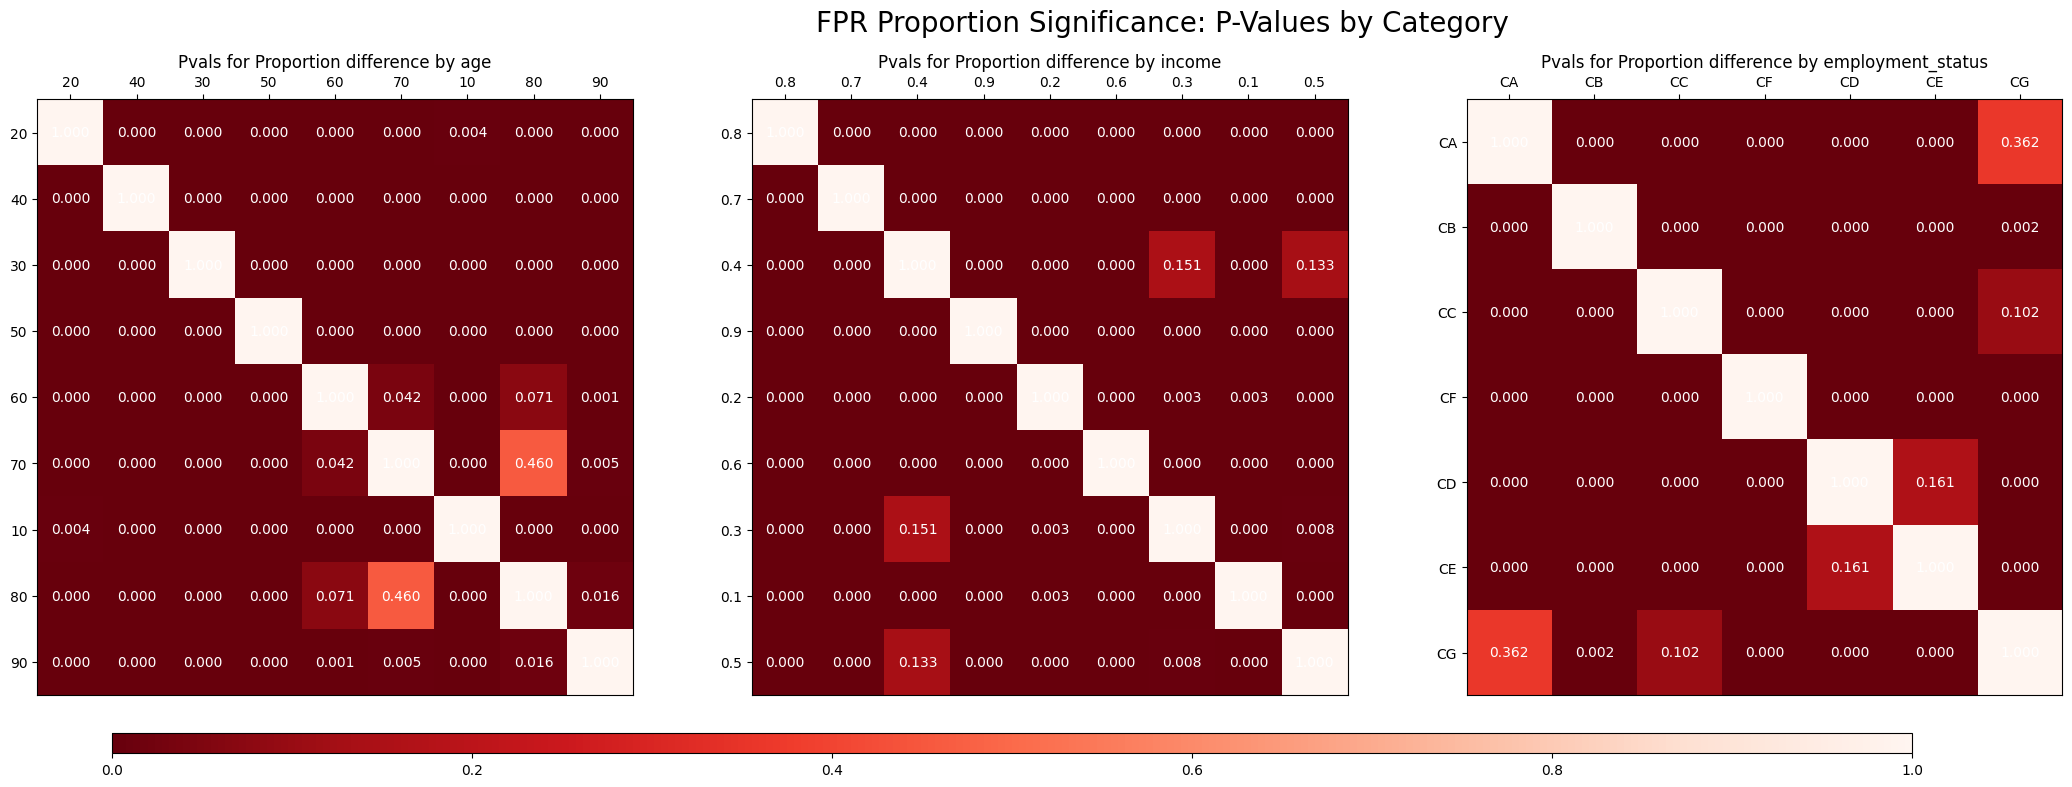

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,8))

for i, cat in enumerate(disparity_dict):
    ax = axes[i]
    pvals = np.zeros((len(disparity_dict[cat]),len(disparity_dict[cat])))
    for r, row in enumerate(pvals):
        for c, col in enumerate(row):
            pvals[r][c] = (compare_proportions(disparity_dict[cat][r][-1], disparity_dict[cat][c][-1]))
    im = ax.imshow(pvals, cmap="Reds_r")
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

    # Show all ticks and label them with the respective list entries
    if cat != "income":
        ax.set_xticks(np.arange(len(pvals)), labels=[x[0] for x in disparity_dict[cat]])
        ax.set_yticks(np.arange(len(pvals)), labels=[x[0] for x in disparity_dict[cat]])
    else:
        ax.set_xticks(np.arange(len(pvals)), labels=['%.1f' % x[0] for x in disparity_dict[cat]])
        ax.set_yticks(np.arange(len(pvals)), labels=['%.1f' % x[0] for x in disparity_dict[cat]])
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="center")

    # Loop over data dimensions and create text annotations.
    for i in range(len(pvals)):
        for j in range(len(pvals[0])):
            text = ax.text(j, i, '%.3f' % pvals[i, j],
                        ha="center", va="center", color="w")

    ax.set_title(f"Pvals for Proportion difference by {cat}")
    #fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([.15, .05, .6, 0.025])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal")
fig.suptitle("FPR Proportion Significance: P-Values by Category", size=20)
plt.show()

## Try to fix bias!!

<BarContainer object of 45 artists>

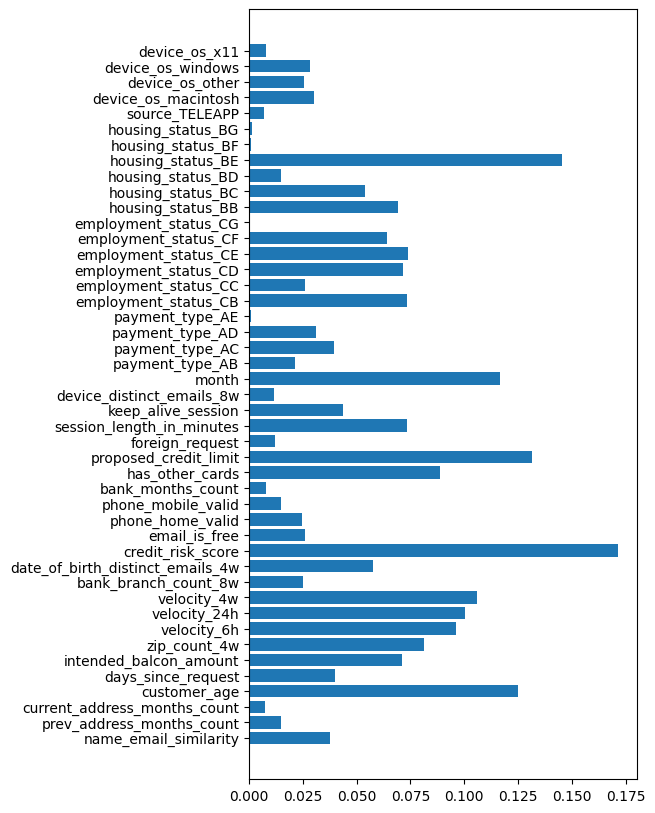

In [62]:
# Get correlations
corr = X_train_transformed.corr()["income"]
corr = corr.drop("income")
plt.rcParams["figure.figsize"] = [5.0, 10.0]
plt.barh(corr.index,np.abs(corr.values))

<BarContainer object of 45 artists>

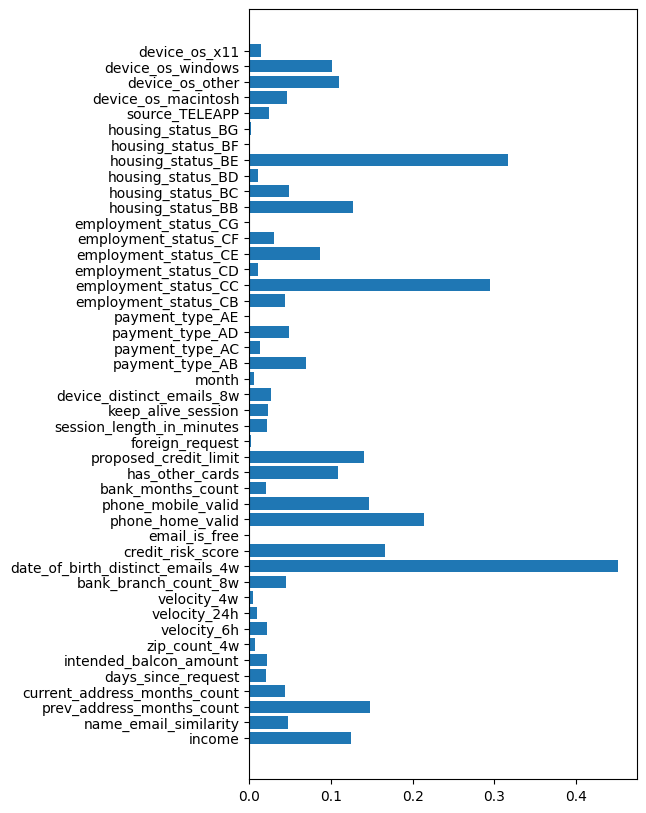

In [63]:
# Get correlations
corr = X_train_transformed.corr()["customer_age"]
corr = corr.drop("customer_age")
plt.rcParams["figure.figsize"] = [5.0, 10.0]
plt.barh(corr.index,np.abs(corr.values))

In [64]:
# Get correlations
corr = X_train_transformed.corr()[['employment_status_CB', 'employment_status_CC', 'employment_status_CD',
       'employment_status_CE', 'employment_status_CF', 'employment_status_CG',]]
#corr = corr.drop("employment_status")
#plt.rcParams["figure.figsize"] = [5.0, 10.0]
#plt.barh(corr.index,np.abs(corr.values))
corr

,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG
income,0.073491,-0.025762,-0.071652,-0.073724,-0.063869,0.000078
name_email_similarity,-0.045494,-0.031876,-0.008696,0.029467,-0.018939,-0.001468
prev_address_months_count,-0.073015,-0.048005,-0.007518,-0.022474,-0.004961,0.002183
current_address_months_count,0.015713,0.020234,-0.002820,0.003061,-0.003844,0.000427
customer_age,0.043548,0.294677,0.010218,-0.086581,0.029870,0.000656
days_since_request,-0.005265,0.013346,0.027357,0.004522,-0.010410,0.005490
intended_balcon_amount,0.031755,-0.031048,-0.031007,0.032459,-0.061730,0.000502
zip_count_4w,0.050816,-0.000010,0.009961,0.001981,0.012597,-0.000133
velocity_6h,0.055040,0.012016,0.016346,0.012555,0.007834,0.000184
velocity_24h,0.071320,0.018366,0.017308,0.010676,-0.001616,0.000659


In [65]:
X_train_transformed.columns

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'month', 'payment_type_AB',
       'payment_type_AC', 'payment_type_AD', 'payment_type_AE',
       'employment_status_CB', 'employment_status_CC', 'employment_status_CD',
       'employment_status_CE', 'employment_status_CF', 'employment_status_CG',
       'housing_status_BB', 'housing_status_BC', 'housing_status_BD',
       'housing_status_BE', 'housing_status_BF', 'housing_status_BG',
       'source_TELEAP

In [66]:
groups = ["income", "customer_age", "employment_status"]
cols = [x for x in X_train_transformed.columns if not any([y in x for y in groups])]
X_train_fair = X_train_transformed[cols]
X_valid_fair = X_valid_transformed[cols]

In [67]:
ann2 = MLPClassifier(
    hidden_layer_sizes = (10),
    activation = 'tanh',
    solver = 'adam',
    learning_rate_init = .001,
    max_iter = 1000
    ).fit(X_train_fair, y_train_transformed)

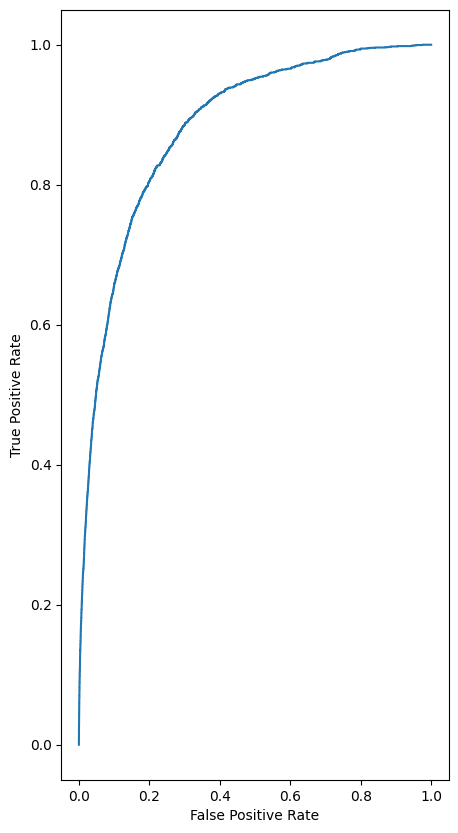

0.8816881601003339


In [68]:
#define metrics
y_pred_proba = ann2.predict_proba(X_valid_fair)[::,1]
fpr, tpr, _ = roc_curve(y_valid_transformed,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Print area
print(roc_auc_score(y_valid_transformed, ann2.predict_proba(X_valid_fair)[:, 1]))

In [69]:
ddf = get_disparity_df(ann2, X_valid_fair)
ddf

TPR:  50.77% 
FPR:  5.0% 
Prob Threshold:  0.04


,true_label,pred_prob,pred_label,true_pos,true_neg,false_pos,false_neg,age,income,employment_status
450657,0,0.018798,False,False,True,False,False,20,0.8,CA
552941,0,0.000270,False,False,True,False,False,20,0.7,CB
344656,0,0.005886,False,False,True,False,False,40,0.4,CA
2777,0,0.000363,False,False,True,False,False,30,0.9,CA
285578,0,0.000397,False,False,True,False,False,30,0.2,CA
...,...,...,...,...,...,...,...,...,...,...
633497,0,0.015338,False,False,True,False,False,20,0.4,CA
963044,0,0.035081,False,False,True,False,False,30,0.9,CA
133268,0,0.000260,False,False,True,False,False,40,0.1,CA
998506,0,0.005385,False,False,True,False,False,20,0.4,CA


In [70]:
#Test for independence
ct = pd.crosstab(ddf["employment_status"], ddf["pred_label"])
stats.chi2_contingency(ct)

Chi2ContingencyResult(statistic=1230.4134348029422, pvalue=1.25181862110594e-262, dof=6, expected_freq=array([[1.29055971e+05, 7.49402924e+03],
       [2.43755587e+04, 1.41544129e+03],
       [6.71034341e+03, 3.89656592e+02],
       [4.78986203e+03, 2.78137973e+02],
       [4.06968151e+03, 2.36318491e+02],
       [7.73863265e+03, 4.49367348e+02],
       [8.69509287e+01, 5.04907133e+00]]))

In [71]:
ddct = get_disparity_dict(ddf)

age category is NOT fair!
            Max fpr: 0.1311612364243943
            Max value: 70
            Max n: 1197
            Min fpr: 0.016853810094843564
            Min value: 20
            Min n: 45865
            Difference: 0.11430742632955075





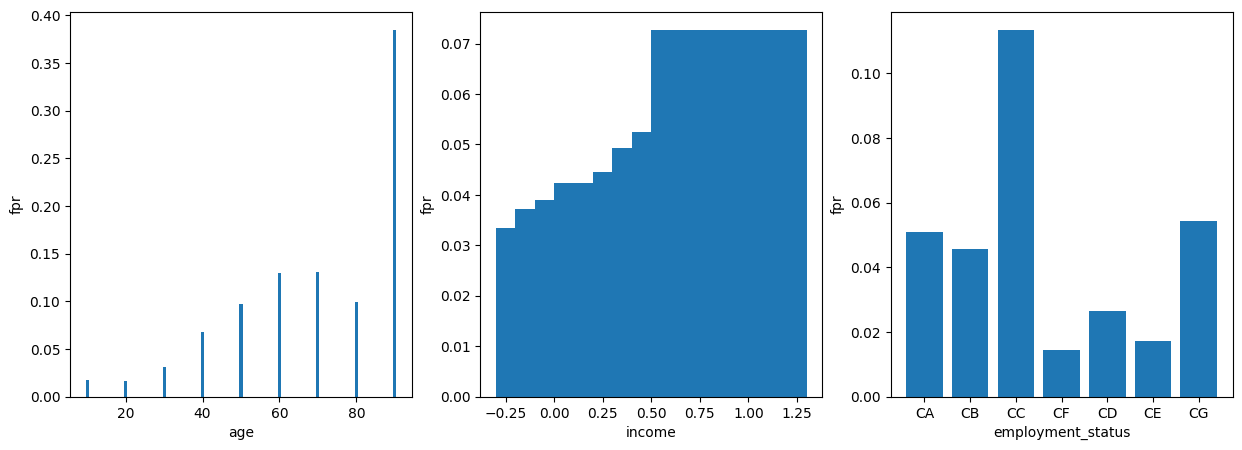

In [72]:
plot_fpr_by_cat(ddct)

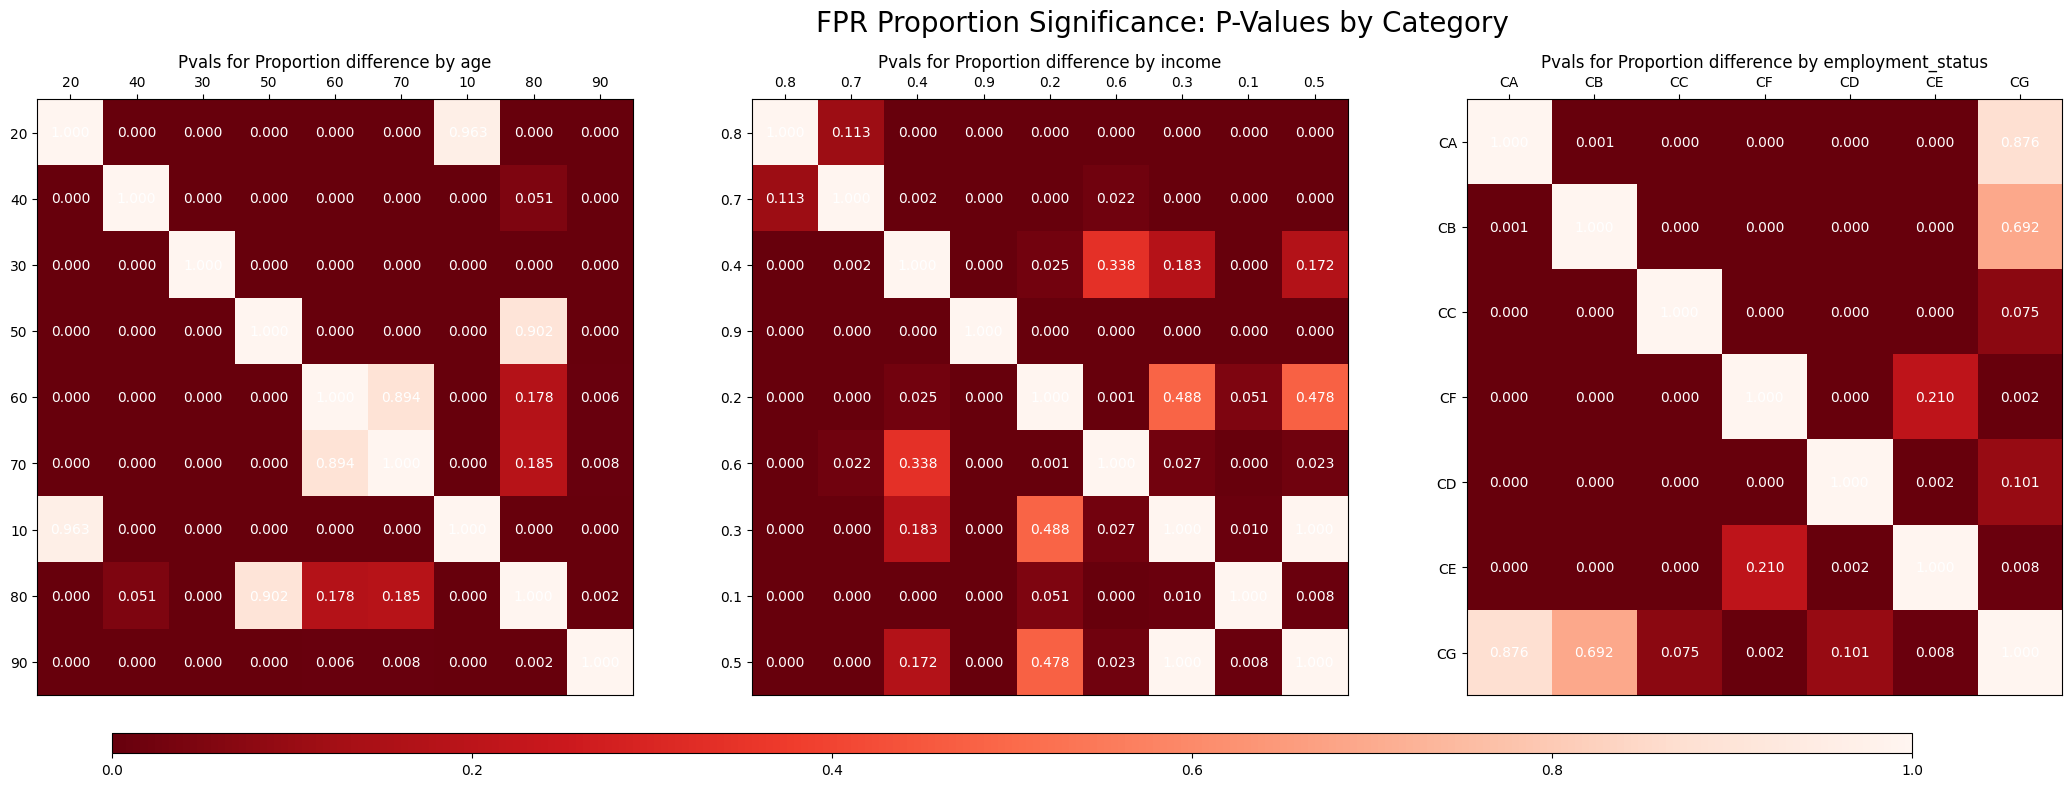

In [73]:
plot_pval_heatmap(ddct)